# Data analysis with example dataset - fun with Pokémon

In [1]:
import os
import numpy as np
import pandas as pd
from IPython.display import Image
from matplotlib import pyplot as plt
%matplotlib inline 
pd.options.mode.chained_assignment = None  # default='warn'

Pokémon is a media franchise managed by The Pokémon Company, a Japanese consortium between Nintendo, Game Freak, and Creatures. It now spans video games, trading card games, animated television shows and movies, comic books, and toys.

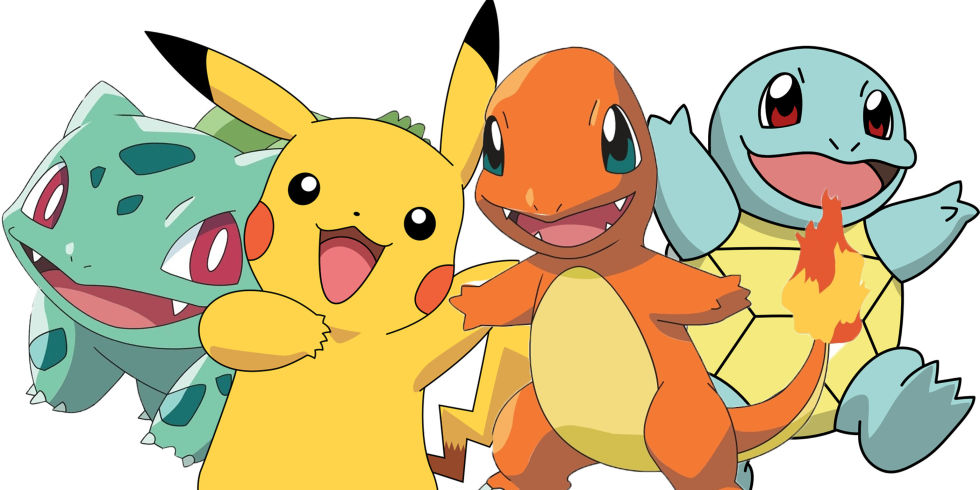

In [2]:
Image('http://cdn-static.denofgeek.com/sites/denofgeek/files/pokemon_4.jpg')

### 1. Read data into memory

Given we have data ready on the disk, we can read it into pandas DataFrame, that is stored in python memory. But are we in the same directory? Let's check to be sure...

In [78]:
# prints current working directory full path
os.getcwd();

In [4]:
# to change directory one level above is as simple as:
# cd ..
os.chdir('..')

In [79]:
# check again
os.getcwd()

We are still not in the same directory as the dataset, so we can either change working directory to the directory with dataset or read the file from that directory. Let's try that.

In [6]:
# reads csv file into 
poke = pd.read_csv('./Datasets/Pokemon.csv', sep=';')

In [7]:
# shows first  few rows of table
poke.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


**Q: What is a DataFrame in pandas?**

It's a collection of Series (columns) with the same lenght that are made of numpy arrays.

In [8]:
# data frame
type(poke)

pandas.core.frame.DataFrame

In [9]:
poke['Name'].head()

0                Bulbasaur
1                  Ivysaur
2                 Venusaur
3    VenusaurMega Venusaur
4               Charmander
Name: Name, dtype: object

In [10]:
# series
type(poke['Name'])

pandas.core.series.Series

In [11]:
# numpy array
type(poke['Name'].values)

numpy.ndarray

In [12]:
# basic python/numpy data type - str, int, float...
type(poke['Name'].values[0])

str

In [32]:
poke['Name'].head(10)

0                    Bulbasaur
1                      Ivysaur
2                     Venusaur
3        VenusaurMega Venusaur
4                   Charmander
5                   Charmeleon
6                    Charizard
7    CharizardMega Charizard X
8    CharizardMega Charizard Y
9                     Squirtle
Name: Name, dtype: object

In [14]:
len(poke)

800

In [15]:
len(poke) == len(poke['Name'])

True

### 2. Explore dataset

What's in the dataset and how does it look like? In data exploration, we try to answer these questions.

In [16]:
# general information about columns
poke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [17]:
# summary statistics of numeric columns
poke.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [18]:
# How many null values are there?
poke.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [19]:
# How many legendary and common pokemon are there?
poke['Legendary'].sum()

65

Q: Can you tell me how is the number calculated and if it is correct?

#### Slicing and filtering - Is there pikachu and what kind of pokemon is he? 

In [20]:
# boolean filtering
poke[poke['Name'] == 'Pikachu']

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
30,25,Pikachu,Electric,NaN,320,35,55,40,50,50,90,1,False


In [21]:
# subsetting with .loc and .iloc
poke[poke.loc[:,'Name'].isin(['Pikachu', 'Bulbasaur', 'Charmander', 'Squirtle'])]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
30,25,Pikachu,Electric,NaN,320,35,55,40,50,50,90,1,False


In [22]:
# creating subset data frame
image_poke = poke[poke.loc[:,'Name'].isin(['Pikachu', 'Bulbasaur', 'Charmander', 'Squirtle'])]
image_poke

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
30,25,Pikachu,Electric,NaN,320,35,55,40,50,50,90,1,False


Let's make some simple plot.

In [23]:
# how to make plot with pandas and what arguments to pass?
image_poke.plot??
# two question marsk show full docstring that is present at documentation webpage for pandas.

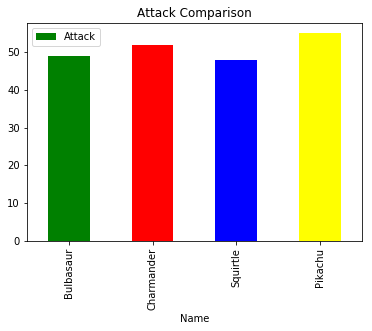

In [24]:
# this draws it in a cell
# barplot that compares attack of chosen pokemon 
image_poke.plot.bar(x='Name', y='Attack', color=('green', 'red', 'blue', 'yellow'), title='Attack Comparison') # 

### 3. Clean data

Can we work with the dataset as it is or do we need to do some adjustments? Filling/removing null values, creating new columns with calculated values, deleting redundant columns, removing incomplete rows, creating relevant subsets of dataset, converting datatypes, renaming column names... These are all part of data cleaning step that is required before we can further analyze the data.

Renaming columns

In [25]:
poke.columns
poke = poke.rename(columns={'#':'Number'})
poke.head()

,Number,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Subset of pokemon that are only common.

In [26]:
only_common = poke[poke['Legendary']==False]
only_common['Legendary'].sum()

0

Subset of pokemon that don't contain 'Mega' in their name.

In [27]:
# Finish subset of DataFrame using condition so that only pokemon that don't have Mega in their name are selected (hint: ~)
no_mega = only_common[~only_common['Name'].str.contains('Mega ')]
no_mega.head()

,Number,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


**Group by** operation to aggregate data.

In [28]:
poke[poke['Number'] == 479]

,Number,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
531,479,Rotom,Electric,Ghost,440,50,50,77,95,77,91,4,False
532,479,RotomHeat Rotom,Electric,Fire,520,50,65,107,105,107,86,4,False
533,479,RotomWash Rotom,Electric,Water,520,50,65,107,105,107,86,4,False
534,479,RotomFrost Rotom,Electric,Ice,520,50,65,107,105,107,86,4,False
535,479,RotomFan Rotom,Electric,Flying,520,50,65,107,105,107,86,4,False
536,479,RotomMow Rotom,Electric,Grass,520,50,65,107,105,107,86,4,False


In [31]:
# check if there is only 1 pokemon for every number
no_mega['Number'].groupby(no_mega['Number']).count().sort_values(ascending=False).head(10)
# we don't want to show so long output afterwards, so we can just add ';' behind the command not to show the output afterwards.

Number
479    6
711    4
710    4
413    3
555    2
648    2
681    2
678    2
647    2
227    1
Name: Number, dtype: int64

Removing mega wasn't enough. Let's consider all pokemon with same number as duplicates, drop them and keep only the first one.

In [55]:
drop_duplicates??

In [33]:
# Finish the subset
nodup_poke = no_mega.drop_duplicates('Number', keep='first', inplace=False)
nodup_poke

,Number,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False
13,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False


In [34]:
# Reindex the dataframe, so the first index is 0 and the last is n-1
nodup_poke.reset_index(inplace=True, drop=True)
nodup_poke

,Number,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
5,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
6,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
7,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
8,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False
9,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False


Now that we have desired and clean dataset, let's move to another step.

### 4. Clean Data Processing

In this step, we are ready to answer our questions with our dataset. In case we don't have any specific questions, we are doing just exploratory data analysis - looking what is inside the data.

So here are some questions:
- Which pokemon type is the most frequent?
- Which pokemon type is the strongest and which the weakest? (according to total stats)
- What are the 5 strongest pokemon among the common pokemon?
- Which pokemon generation has the biggest average total stats?
- How strong is Pikachu among pokemon of the same type?

In [35]:
# How many unique pokemon are there in the remaining dataset?
len(nodup_poke['Number'].unique())
# nodup_poke['Name'].unique()

675

In [36]:
# Which pokemon type is the strongest and which the weakest on average? (according to total stats)
strongest_type_avg = nodup_poke[['Type 1','Total']].groupby(nodup_poke['Type 1']).mean().sort_values(by='Total', ascending=False)
strongest_type_avg

,Total
Type 1,
Dragon,443.941176
Steel,432.666667
Rock,426.052632
Fire,423.380952
Dark,418.961538
Ice,412.523810
Ghost,412.000000
Water,410.549020
Psychic,407.615385


What happened in the previous line of code? Let's look:
1. Choose a data frame subset based on what values you want to see in result -  **nodup_poke[['Type 1','Total']]**
2. Choose a column you want the table to be grouped by. To group values means put all rows with the same value of selected column into one row. - **groupby(nodup_poke['Type 1'])**
3. Now that we have many values in the same row, we need to transform them into one value with aggregation function. Typical examples are *count, average, sum, max* - **mean()**
4. The last step is sorting the result based on values in descending order - **sort_values(by='Total', ascending=False)**

Try the same logic in the upcoming examples:

In [43]:
# Find the strongest pokemon in each group based on Type 1 and order them alphabetically from A-Z.
# Notice, this one has different logic - we do sorting first and only then group by and take the first observation for every group.
strongest_type_max = nodup_poke[['Total', 'Name', 'Type 1']].sort_values(
                                by='Total', ascending=False).groupby('Type 1', as_index=False).first()
strongest_type_max 

,Type 1,Total,Name
0,Bug,600,Genesect
1,Dark,600,Hydreigon
2,Dragon,600,Goodra
3,Electric,540,Electivire
4,Fairy,552,Florges
5,Fighting,525,Lucario
6,Fire,555,Arcanine
7,Flying,535,Noivern
8,Ghost,525,Dusknoir
9,Grass,535,Tangrowth


In [44]:
# Which pokemon type is the most frequent?
type_frequency = nodup_poke['Type 1'].groupby(nodup_poke['Type 1']).count().sort_values(ascending=False)
type_frequency

Type 1
Water       102
Normal       91
Grass        64
Bug          63
Fire         42
Psychic      39
Rock         38
Electric     33
Poison       28
Ground       28
Dark         26
Fighting     25
Ghost        22
Ice          21
Steel        18
Dragon       17
Fairy        16
Flying        2
Name: Type 1, dtype: int64

In [45]:
# What are the 5 strongest pokemon among the common pokemon?
top5_poke = nodup_poke.sort_values(by='Total', ascending=False)[0:5]
top5_poke

,Number,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
279,289,Slaking,Normal,NaN,670,150,160,100,95,65,100,3,False
240,248,Tyranitar,Rock,Dark,600,100,134,110,95,100,61,2,False
665,706,Goodra,Dragon,NaN,600,90,100,70,110,150,80,6,False
366,376,Metagross,Steel,Psychic,600,80,135,130,95,90,70,3,False
363,373,Salamence,Dragon,Flying,600,95,135,80,110,80,100,3,False


In [47]:
# Which pokemon generation has the biggest average total stats?
generation_comparison = nodup_poke[['Generation', 'Total']].groupby(
                                    nodup_poke['Generation']).mean().sort_values(by='Total', ascending=False)
generation_comparison

,Generation,Total
Generation,,
4,4.0,424.229167
5,5.0,412.520548
6,6.0,411.666667
1,1.0,401.693878
2,2.0,394.926316
3,3.0,384.944000


In [48]:
# What type is pikachu?
pikachu_type = nodup_poke['Type 1'][nodup_poke['Name'] == 'Pikachu'].values[0]
pikachu_type

'Electric'

In [49]:
# How strong is Pikachu among pokemon of the same type? Hint: debugging
# pikachu_rank = nodup_poke[nodup_poke['Type 1'] == 'Electric'].sort_values(by='Type 1')
pikachu_rank = nodup_poke[nodup_poke['Type 1'] == pikachu_type].sort_values(by='Total', ascending=False)
pikachu_rank

,Number,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
446,466,Electivire,Electric,NaN,540,75,123,67,95,85,95,4,False
442,462,Magnezone,Electric,Steel,535,70,70,115,130,90,60,4,False
134,135,Jolteon,Electric,NaN,525,65,65,60,110,95,130,1,False
385,405,Luxray,Electric,NaN,523,80,120,79,95,79,70,4,False
572,604,Eelektross,Electric,NaN,515,85,115,80,105,80,50,5,False
176,181,Ampharos,Electric,NaN,510,90,75,85,115,90,55,2,False
491,523,Zebstrika,Electric,NaN,497,75,100,63,80,63,116,5,False
124,125,Electabuzz,Electric,NaN,490,65,83,57,95,85,105,1,False
25,26,Raichu,Electric,NaN,485,60,90,55,90,80,110,1,False
654,695,Heliolisk,Electric,Normal,481,62,55,52,109,94,109,6,False


In [50]:
# reset index of table to start from 0 to n-1
pikachu_rank.reset_index(inplace=True)
pikachu_rank

,index,Number,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,446,466,Electivire,Electric,NaN,540,75,123,67,95,85,95,4,False
1,442,462,Magnezone,Electric,Steel,535,70,70,115,130,90,60,4,False
2,134,135,Jolteon,Electric,NaN,525,65,65,60,110,95,130,1,False
3,385,405,Luxray,Electric,NaN,523,80,120,79,95,79,70,4,False
4,572,604,Eelektross,Electric,NaN,515,85,115,80,105,80,50,5,False
5,176,181,Ampharos,Electric,NaN,510,90,75,85,115,90,55,2,False
6,491,523,Zebstrika,Electric,NaN,497,75,100,63,80,63,116,5,False
7,124,125,Electabuzz,Electric,NaN,490,65,83,57,95,85,105,1,False
8,25,26,Raichu,Electric,NaN,485,60,90,55,90,80,110,1,False
9,654,695,Heliolisk,Electric,Normal,481,62,55,52,109,94,109,6,False


### 5. Results visualization

- Create a histogram of all common pokemon's total stats
- Create a boxplot of total stats by type
- Create a boxplot of total stats by generation
- Create a barplot of total stats by generation
- Show Pikachu's total stats among other pokemon of the same type together with generation of pokemon

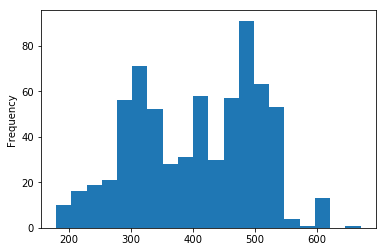

In [51]:
# Create a histogram of all common pokemon's total stats
nodup_poke['Total'].plot.hist(bins=20)

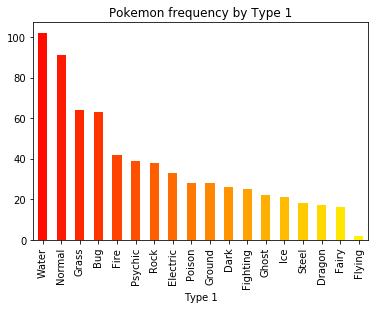

In [60]:
import matplotlib.cm as cm  # these would normally be at the beginning of the notebook

# colormaps https://matplotlib.org/examples/color/colormaps_reference.html
type_colors = cm.autumn(np.linspace(0.05,0.95,len(type_frequency)))
type_frequency.plot.bar(color=type_colors, title='Pokemon frequency by Type 1')

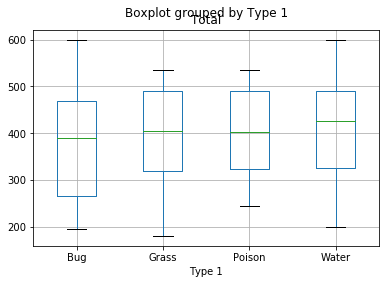

In [53]:
# Create a boxplot of average total stats by type. Hint: use tables we created in previous step
nodup_poke[nodup_poke['Type 1'].isin(['Bug', 'Water', 'Grass', 'Poison'])
          ].boxplot(column='Total', by='Type 1')

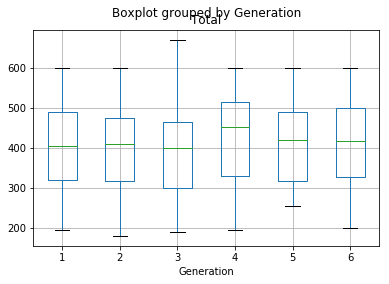

In [54]:
# Create a boxplot of total stats by generation
nodup_poke.boxplot(column='Total', by='Generation')

In [68]:
gen_colors

array([[ 0.04705882,  0.52352941,  0.4       ,  1.        ],
       [ 0.22745098,  0.61372549,  0.4       ,  1.        ],
       [ 0.40784314,  0.70392157,  0.4       ,  1.        ],
       [ 0.59215686,  0.79607843,  0.4       ,  1.        ],
       [ 0.77254902,  0.88627451,  0.4       ,  1.        ],
       [ 0.95294118,  0.97647059,  0.4       ,  1.        ]])

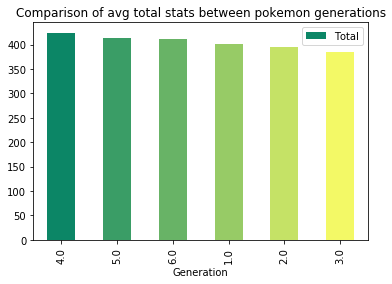

In [77]:
# Create a barplot of total stats by generation
#gener = nodup_poke[['Total']].groupby(nodup_poke['Generation']).mean().sort_values(by='Total',ascending=False)
generation_comparison['Generation'] = generation_comparison['Generation'].astype('str')
gen_colors = cm.summer(np.linspace(0.05,0.95,len(generation_comparison)))
generation_comparison.plot.bar(x='Generation',color=gen_colors, title='Comparison of avg total stats between pokemon generations')

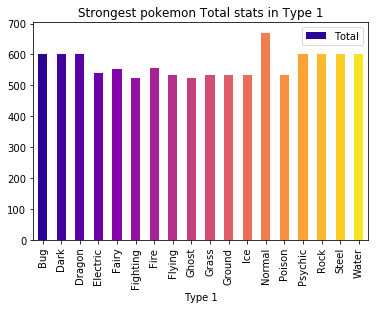

In [76]:
# Create a barplot of strongest pokemon in each Type 1. One color for all is fine.
type_colors = cm.plasma(np.linspace(0.05,0.95,len(strongest_type_max)))
strongest_type_max[['Type 1', 'Total']].plot.bar(x='Type 1',color=type_colors, title = 'Strongest pokemon Total stats in Type 1')

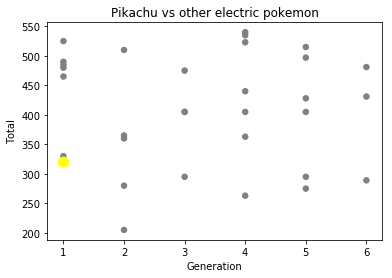

In [106]:
# Show Pikachu's total stats among other pokemon of the same type together with generation of pokemon
pikachu_rank['color'] = 'Grey'
pikachu_rank['size'] = 30
pikachu_rank['color'][pikachu_rank['Name']=='Pikachu']='Yellow'
pikachu_rank['size'][pikachu_rank['Name']=='Pikachu']=100
pika_plot = pikachu_rank.plot.scatter(x='Generation', y='Total', 
                                      c=pikachu_rank['color'], s=pikachu_rank['size'],
                          title='Pikachu vs other electric pokemon')

Save the plot as png file

In [107]:
fig = pika_plot.get_figure()
fig.savefig('pika_plot.png')